Tematem projektu jest sprawdzenie w jakim czasie zostanie osiągnięta odporność zbiorowa w przypadku COVID-19 w Europie.

Dane zostały pobrane z https://www.kaggle.com/gpreda/covid-world-vaccination-progress i
przedstawiają dzienne statystyki dotyczące szczepień dla każdego kraju na świecie.

Dane składają się z 14 kolumn, z których wybrane zostały najważniejsze pod względem istotności badanego problemu. Kolumny nie mające związku z tematem projektu tj. typ szczepionki, ilość ludzi zaszczepionych na sto, źródło danych, zostały usunięte.
Badane cechy to m.in: 
nazwa kraju, data, ilość dziennych szczepień, ilość ludzi zaszczepionych.
Do przeprowadzonych analiz zostały wybrane wyłącznie kraje europejskie.


In [43]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv('./country_vaccinations.csv', delimiter=',')

columnsToDrop = ['iso_code', 'daily_vaccinations_raw', 'source_website', 'source_name',
                 'vaccines', 'people_fully_vaccinated_per_hundred',
                 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred']

data = df.drop(columnsToDrop, 1)
data = data[data['daily_vaccinations'].notna()]

#  ---- ADD POPULATION -----
df_population = pd.read_csv("population.csv", delimiter=',', sep=',', header=2, usecols=['Country Name', '2019'])
df_population.loc[df_population['Country Name'] == 'Slovak Republic', 'Country Name'] = 'Slovakia'

for i in range(0,len(df_population)):
    data.loc[data['country'] == df_population.loc[i, 'Country Name'], 'population'] = df_population.loc[i, '2019']

#  ---- EUROPE STATISTICS / FILL NaN -----
europe_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland','France','Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden']
europe_data = data[data['country'].isin(europe_countries)]
for i in range(0, len(europe_countries)):
    europe_data.loc[europe_data['country'] == europe_countries[i], 'country'] = i

europe_data = europe_data.sort_values(by=['date'])
europe_data = europe_data.reset_index(drop=True)

import datetime as dt
europe_data['date'] = pd.to_datetime(europe_data['date'])

date_column = europe_data['date'].copy()
country_column = europe_data['country'].copy()

europe_data = europe_data.fillna(europe_data.mean())
europe_data

/Users/blania/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,daily_vaccinations_per_million,population
0,0,2020-12-28,2.031000e+03,2.031000e+03,6.373984e+05,1299.0,144.0,8877067.0
1,10,2020-12-28,4.288500e+04,4.287400e+04,1.100000e+01,18382.0,219.0,83132799.0
2,22,2020-12-28,2.066000e+03,2.066000e+03,6.373984e+05,1101.0,57.0,19356544.0
3,14,2020-12-28,8.606000e+03,8.606000e+03,6.373984e+05,1436.0,24.0,60297396.0
4,16,2020-12-28,5.209000e+03,5.209000e+03,6.373984e+05,2788.0,1024.0,2786844.0
5,6,2020-12-28,8.393000e+03,8.393000e+03,6.373984e+05,2018.0,348.0,5818553.0
6,25,2020-12-28,1.921756e+06,1.407134e+06,6.373984e+05,1923.0,190.0,10285453.0
7,9,2020-12-28,7.600000e+01,7.600000e+01,6.373984e+05,59.0,1.0,67059887.0
8,21,2020-12-28,7.754000e+03,7.754000e+03,6.373984e+05,2791.0,274.0,10269417.0
9,10,2020-12-29,9.234600e+04,9.174600e+04,6.000000e+02,33922.0,405.0,83132799.0



Dane zostały zgrupowane datami, a następnie zsumowane - tak aby przedstawiały sumę skumulowaną dziennych statystyk z europejskich krajów.
Wiersze zostały posortowane według daty.


In [44]:
europe_data = europe_data.drop(['country'], 1)
europe_data = europe_data.drop(['daily_vaccinations_per_million'], 1)

days = europe_data['date'].unique()
print("Number of days: ", len(days))

europe_data = europe_data.groupby(['date'], as_index=False).sum()
europe_data = europe_data.set_index('date')

europe_data['total_vaccinations_percentage'] = europe_data['total_vaccinations']/europe_data['population']

europe_data.head(10)

Number of days:  121


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,population,total_vaccinations_percentage
date,,,,,,
2020-12-28,1.998776e+06,1.484143e+06,5.099198e+06,31797.0,267883960.0,0.007461
2020-12-29,2.088204e+06,4.384272e+06,8.924177e+06,62992.0,341064539.0,0.006123
2020-12-30,2.220966e+06,4.515334e+06,9.561580e+06,92600.0,348040300.0,0.006381
2020-12-31,1.000422e+07,1.023761e+07,1.083652e+07,95706.0,352727696.0,0.028362
2021-01-01,1.766858e+07,1.444088e+07,1.211131e+07,85102.0,363189454.0,0.048648
2021-01-02,2.165724e+07,1.599538e+07,1.211159e+07,88976.0,363189454.0,0.059631
2021-01-03,1.407981e+07,1.327614e+07,1.147424e+07,86555.0,363189454.0,0.038767
2021-01-04,8.492840e+06,1.203673e+07,1.211159e+07,107427.0,363189454.0,0.023384
2021-01-05,6.975275e+06,9.622130e+06,1.338641e+07,188832.0,415720308.0,0.016779


<AxesSubplot:>

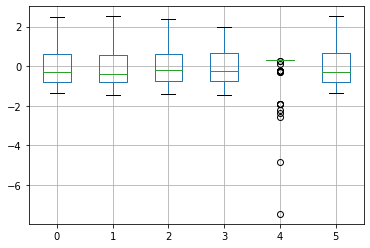

In [39]:
#  ---- STANDARDIZATION ----
europe_data = europe_data.values
X_standard_scaler = europe_data - europe_data.mean(axis=0)
X_standard_scaler = X_standard_scaler / europe_data.std(axis=0)

dr = pd.DataFrame(X_standard_scaler)
dr.boxplot()

,0,1,2,3,4,5
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.355684,0.365146,0.375267,0.422357,0.960234,0.347609
std,0.262013,0.252550,0.265732,0.290165,0.129258,0.260799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.147604,0.167711,0.174367,0.200618,1.000000,0.138830
50%,0.281064,0.269833,0.323303,0.349853,1.000000,0.268438
75%,0.515180,0.511357,0.539609,0.614549,1.000000,0.526906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


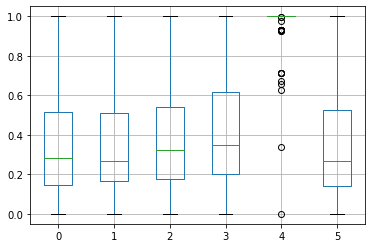

In [40]:
#  ---- STANDARDIZATION - USING SKLEARN ----
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_input_scaled = min_max_scaler.fit_transform(europe_data)
df_new = pd.DataFrame(data_input_scaled)

df_new.boxplot()
df_new.describe()

Ponieżej został przedstawiony podział na zbiór testowy i treningowy z wykorzystaniem 
funkcji train_test_split(). 
Zbiory zostały wykorzystane na dwóch regresorach:
    - XGBRegressor (XGBoost for Regression)
    - SVR (Support Vector Regression)

Do sprawdzenia miary regresorów zostały wykorzystane:
    - Mean Square Error
    - R2 Score

In [41]:
from sklearn.model_selection import train_test_split

X = dr.values[:,2:]
y = dr.values[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)
x_ax = range(len(y_test))

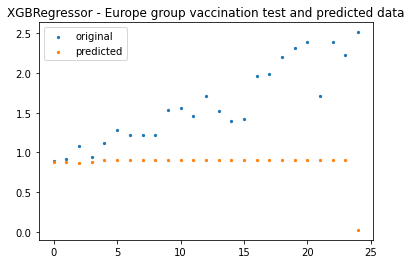

In [45]:
from xgboost import XGBRegressor

xgb_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

plt.scatter(x_ax, y_test, s=5, label="original")
plt.scatter(x_ax, y_pred_xgb, s=5, label="predicted")
plt.title("XGBRegressor - Europe group vaccination test and predicted data")
plt.legend()
plt.show()

/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


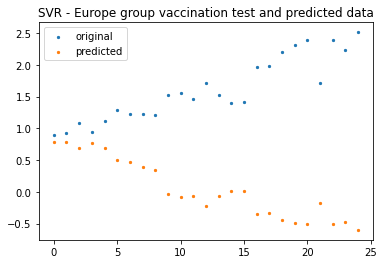

In [46]:
from sklearn.svm import SVR

svr_clf = SVR()
svr_clf.fit(X_train, y_train)
y_pred_svr = svr_clf.predict(X_test)

plt.scatter(x_ax, y_test, s=5, label="original")
plt.scatter(x_ax, y_pred_svr, s=5, label="predicted")
plt.title("SVR - Europe group vaccination test and predicted data")
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

def get_squared_error_score(x, y):
    y_prediction = np.reshape(y, (y.shape[0], -1))
    return mean_squared_error(x, y)

def get_r2_score(x, y):
    y_prediction = np.reshape(y, (y.shape[0], -1))
    zx = (x-np.mean(x))/np.std(x, ddof=1)
    zy = (y_prediction-np.mean(y_prediction))/np.std(y_prediction, ddof=1)
    r = np.sum(zx*zy)/(len(x)-1)
    return r**2

r2_score_xgb = get_r2_score(y_test, y_pred_xgb)
r2_score_svr = get_r2_score(y_test, y_pred_svr)

print(f'XGBRegressor score: {r2_score_xgb}')
print(f'SVR score: {r2_score_svr}')


XGBRegressor score: 0.11428837414241201
SVR score: 0.9034308238494453


In [35]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

time_series_split = TimeSeriesSplit(max_train_size=None, n_splits=10)
i = 0
for train_index, test_index in time_series_split.split(X):
    i += 1
    X_train_cross_validation, X_test_cross_validation = X[train_index], X[test_index]
    y_train_cross_validation, y_test_cross_validation = y[train_index], y[test_index]
    print(f'Iteration: {i}   Train interval: {train_index[0]}-{train_index[-1]}   Test interval: {test_index[0]}-{test_index[-1]}')


Iteration: 1   Train interval: 0-10   Test interval: 11-21
Iteration: 2   Train interval: 0-21   Test interval: 22-32
Iteration: 3   Train interval: 0-32   Test interval: 33-43
Iteration: 4   Train interval: 0-43   Test interval: 44-54
Iteration: 5   Train interval: 0-54   Test interval: 55-65
Iteration: 6   Train interval: 0-65   Test interval: 66-76
Iteration: 7   Train interval: 0-76   Test interval: 77-87
Iteration: 8   Train interval: 0-87   Test interval: 88-98
Iteration: 9   Train interval: 0-98   Test interval: 99-109
Iteration: 10   Train interval: 0-109   Test interval: 110-120


Ponieważ stosujemy szeregi czasowe, przewidywanie przeszłości za pomocą danych z przyszłości wydaje się być bez sensu. Z tego powodu stosujemy dzielenie danych na podzbiory w sposób przedstawiony na ilustracji poniżej:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
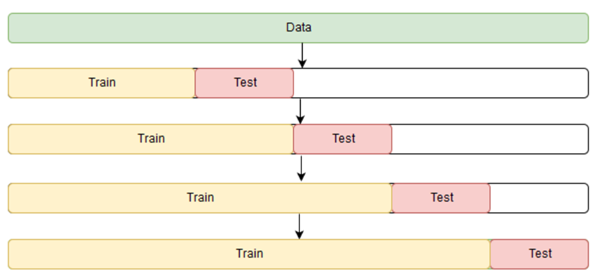

Zastosowanie powyższej walidacji krzyżowej dla poszczególnych regresorów:

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn import tree
from sklearn import neighbors
from statistics import mean
from IPython.display import HTML, display
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

def svr_regression_prediction(X_train, y_train, X_test):
    svr_clf = SVR()
    svr_clf = GridSearchCV(svr_clf, svr_parameters, scoring='r2',  n_jobs=-1)
    svr_clf.fit(X_train, y_train)
    y_pred_svr = svr_clf.predict(X_test)
    return y_pred_svr
    
def xgb_regression_prediction(X_train, y_train, X_test):
    xgb_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100, n_jobs=-1)
    xgb_clf = RandomizedSearchCV(xgb_clf, xgb_parameters, scoring='r2',  n_jobs=-1)
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)
    return y_pred_xgb

def mlp_regression_prediction(X_train, y_train, X_test):
    mlp_clf = MLPRegressor()
    mlp_clf = GridSearchCV(mlp_clf, mlp_parameters, scoring='r2',  n_jobs=-1)
    mlp_clf.fit(X_train, y_train)
    y_pred_mlp = mlp_clf.predict(X_test)
    return y_pred_mlp

def tree_regression_prediction(X_train, y_train, X_test):
    tree_clf = tree.DecisionTreeRegressor()
    tree_clf = GridSearchCV(tree_clf, tree_parameters, scoring='r2',  n_jobs=-1)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X_test)
    return y_pred_tree

def k_neighbors_regression_prediction(X_train, y_train, X_test):
    k_neighbors_clf = neighbors.KNeighborsRegressor(n_jobs=-1)
    k_neighbors_clf.fit(X_train, y_train)
    y_pred_k_neighbors = k_neighbors_clf.predict(X_test)
    return y_pred_k_neighbors

def voting_regression_prediction(X_train, y_train, X_test, clf_1, clf_2, clf_3):
    voting_clf = VotingRegressor([('clf1', clf_1), ('clf2', clf_2), ('clf3', clf_3)], n_jobs=-1)
    voting_clf.fit(X_train, y_train)
    y_pred_voting = voting_clf.predict(X_test)
    return y_pred_voting

def stacking_regression_prediction(X_train, y_train, X_test, clf_1, clf_2, clf_3):
    stacking_clf = StackingRegressor([('clf1', clf_1), ('clf2', clf_2), ('clf3', clf_3)], n_jobs=-1)
    stacking_clf.fit(X_train, y_train)
    y_pred_stacking = stacking_clf.predict(X_test)
    return y_pred_stacking


svr_parameters = {'kernel':['poly', 'sigmoid', 'rbf'], 'C':[1, 0.1, 10],
                 'gamma':['scale', 'auto'], 'coef0': [0.0, 0.1]}
mlp_parameters = {'alpha': [0.01, 0.0001, 0.001], 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate': ['constant', 'invscaling', 'adaptive']}
tree_parameters = {'splitter': ['best', 'random'], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                  }
xgb_parameters = {'max_depth': [6, 10, 3], 'min_child_weight': [1], 'eta': [0.3, 0.1, 0.05],
                  'subsample': [1, 0.5], 'colsample_bytree': [1, 0.9, 0.7], 
                  'objective':['reg:linear', 'reg:squarederror', 'multi:softprob', 'binary:logistic'], 
                 }

svr_r2_scores = []
xgb_r2_scores = []
mlp_r2_scores = []
tree_r2_scores = []
k_neighbours_r2_scores = []
svr_squared_scores = []
xgb_squared_scores = []
mlp_squared_scores = []
tree_squared_scores = []
k_neighbours_squared_scores = []
voting_r2_scores = []
voting_squared_scores = []
stacking_r2_scores = []
stacking_squared_scores = []
i = 0
for train_index, test_index in time_series_split.split(X):
    i += 1
    X_train_cross_validation, X_test_cross_validation = X[train_index], X[test_index]
    y_train_cross_validation, y_test_cross_validation = y[train_index], y[test_index]
    
    prediction_svr = svr_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_svr = get_r2_score(y_test_cross_validation, prediction_svr)
    squared_score_svr = get_squared_error_score(y_test_cross_validation, prediction_svr)
    svr_r2_scores.append(r2_score_svr)
    svr_squared_scores.append(squared_score_svr)
    
    prediction_xgb = xgb_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_xgb = get_r2_score(y_test_cross_validation, prediction_xgb)
    squared_score_xgb = get_squared_error_score(y_test_cross_validation, prediction_xgb)
    xgb_r2_scores.append(r2_score_xgb)
    xgb_squared_scores.append(squared_score_xgb)
    
    prediction_mlp = mlp_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_mlp = get_r2_score(y_test_cross_validation, prediction_mlp)
    squared_score_mlp = get_squared_error_score(y_test_cross_validation, prediction_mlp)
    mlp_r2_scores.append(r2_score_mlp)
    mlp_squared_scores.append(squared_score_mlp)
    
    prediction_tree_regression = tree_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_tree_regression = get_r2_score(y_test_cross_validation, prediction_tree_regression)
    squared_score_tree_regression = get_squared_error_score(y_test_cross_validation, prediction_tree_regression)
    tree_r2_scores.append(r2_score_tree_regression)
    tree_squared_scores.append(squared_score_tree_regression)
    
    prediction_k_neighbours = k_neighbors_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation)
    r2_score_k_neighbours = get_r2_score(y_test_cross_validation, prediction_k_neighbours)
    squared_score_k_neighbours = get_squared_error_score(y_test_cross_validation, prediction_k_neighbours)
    k_neighbours_r2_scores.append(r2_score_k_neighbours)
    k_neighbours_squared_scores.append(squared_score_k_neighbours)
    
    
    #VOTING CLASSIFIER
    xgb_vote_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100)
    mlp_vote_clf = MLPRegressor()
    tree_vote_clf = tree.DecisionTreeRegressor()
    prediction_voting = voting_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation, xgb_vote_clf, mlp_vote_clf, tree_vote_clf)
    r2_score_voting = get_r2_score(y_test_cross_validation, prediction_voting)
    squared_score_voting = get_squared_error_score(y_test_cross_validation, prediction_voting)
    voting_r2_scores.append(r2_score_voting)
    voting_squared_scores.append(squared_score_voting)
    
    #STACKING CLASSIFIER
    xgb_stack_clf = XGBRegressor(objective="reg:squarederror", n_estimators=100)
    mlp_stack_clf = MLPRegressor()
    tree_stack_clf = tree.DecisionTreeRegressor()
    prediction_stacking = stacking_regression_prediction(X_train_cross_validation, y_train_cross_validation, X_test_cross_validation, xgb_stack_clf, mlp_stack_clf, tree_stack_clf)
    r2_score_stacking = get_r2_score(y_test_cross_validation, prediction_stacking)
    squared_score_stacking = get_squared_error_score(y_test_cross_validation, prediction_stacking)
    stacking_r2_scores.append(r2_score_stacking)
    stacking_squared_scores.append(squared_score_stacking)
    
    
table_data = [['Regressor model', 'Average r2 score', 'Mean Squared Error score']]
table_data.append(['SVR', mean(svr_r2_scores), mean(svr_squared_scores)])
table_data.append(['XGBRegressor', mean(xgb_r2_scores), mean(xgb_squared_scores)])
table_data.append(['MLP', mean(mlp_r2_scores), mean(mlp_squared_scores)])
table_data.append(['Decision Tree', mean(tree_r2_scores), mean(tree_squared_scores)])
table_data.append(['K-neighbours', mean(k_neighbours_r2_scores), mean(k_neighbours_squared_scores)])
table_data.append(['Voting Regressor', mean(voting_r2_scores), mean(voting_squared_scores)])
table_data.append(['Stacking Regressor', mean(stacking_r2_scores), mean(stacking_squared_scores)])

display_table(table_data)


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-107.10023112           nan           nan           nan           nan
           nan           nan -152.00538071           nan -154.60185715]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: 

[13:28:42] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 0.2628829  -0.50605281  0.30050116 -0.31989247  0.28874706 -0.01370606
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

[13:28:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.38748234 -0.56786944 -0.49667492 -0.16189928 -0.14616244 -0.82591932
         nan         nan]
  warnings.warn(
<ipython-input-20-5eb1045949ff>:10: RuntimeWarning: invalid value encountered in true_divide
  zy = (y_prediction-np.mean(y_prediction))/np.std(y_prediction, ddof=1)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/py

[13:29:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.32650279 -0.92183532 -0.24926157 -3.57256712 -0.33653608 -2.47091658
         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

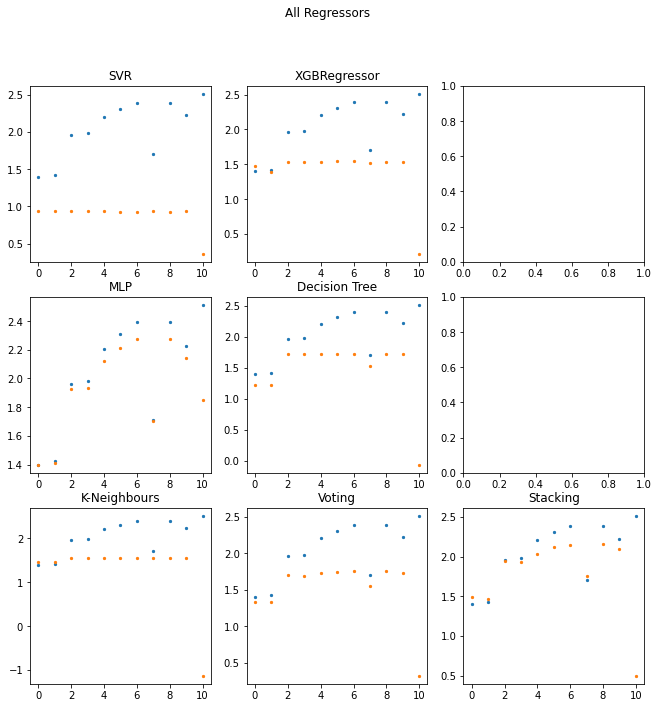

In [73]:
x_ax = range(len(y_test_cross_validation))    
mtl.rcParams['figure.figsize'] = (11,11)
fig, axs = plt.subplots(3, 3)
fig.suptitle('All Regressors')
axs[0, 0].set_title('SVR')
axs[0, 0].scatter(x_ax, y_test_cross_validation, s=5)
axs[0, 0].scatter(x_ax, prediction_svr, s=5)
axs[0, 1].set_title('XGBRegressor')
axs[0, 1].scatter(x_ax, y_test_cross_validation, s=5)
axs[0, 1].scatter(x_ax, prediction_xgb, s=5)
axs[1, 0].set_title('MLP')
axs[1, 0].scatter(x_ax, y_test_cross_validation, s=5)
axs[1, 0].scatter(x_ax, prediction_mlp, s=5)
axs[1, 1].set_title('Decision Tree')
axs[1, 1].scatter(x_ax, y_test_cross_validation, s=5)
axs[1, 1].scatter(x_ax, prediction_tree_regression, s=5)
axs[2, 0].set_title('K-Neighbours')
axs[2, 0].scatter(x_ax, y_test_cross_validation, s=5)
axs[2, 0].scatter(x_ax, prediction_k_neighbours, s=5)
axs[2, 1].set_title('Voting')
axs[2, 1].scatter(x_ax, y_test_cross_validation, s=5)
axs[2, 1].scatter(x_ax, prediction_voting, s=5)
axs[2, 2].set_title('Stacking')
axs[2, 2].scatter(x_ax, y_test_cross_validation, s=5)
axs[2, 2].scatter(x_ax, prediction_stacking, s=5)

In [25]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def run_grid_search(model, parameters, X_train, y_train):
    grid_search = GridSearchCV(model, parameters, scoring='r2',  n_jobs=-1)
    result = grid_search.fit(X_train, y_train)
    print('\nModel: ', model)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    
def run_randomized_search(model, parameters, X_train, y_train):
    grid_search = RandomizedSearchCV(model, parameters, scoring='r2',  n_jobs=-1)
    result = grid_search.fit(X_train, y_train)
    print('\nModel: ', model)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    
svr_parameters = {'kernel':['poly', 'sigmoid', 'rbf'], 'C':[1, 0.1, 10],
                 'gamma':['scale', 'auto'], 'coef0': [0.0, 0.1]}
mlp_parameters = {'alpha': [0.01, 0.0001, 0.001], 'solver':['lbfgs', 'sgd', 'adam'],
                 'learning_rate': ['constant', 'invscaling', 'adaptive']}
tree_parameters = {'random_state': [0, 1, 10],'splitter': ['best', 'random'], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],}
xgb_parameters = {'max_depth': [6, 10, 3], 'min_child_weight': [1], 'eta': [0.3, 0.1, 0.05],
                  'subsample': [1, 0.5], 'colsample_bytree': [1, 0.9, 0.7], 
                  'objective':['reg:linear', 'reg:squarederror', 'multi:softprob', 'binary:logistic'], }

svr_model = svm.SVR()
mlp_model = MLPRegressor()
tree_model = tree.DecisionTreeRegressor()
xgb_model = XGBRegressor()

run_grid_search(svr_model, svr_parameters, X_train, y_train)
run_grid_search(mlp_model, mlp_parameters, X_train, y_train)
run_grid_search(tree_model, tree_parameters, X_train, y_train)
# run_grid_search(xgb_model, xgb_parameters, X_train, y_train)

run_randomized_search(svr_model, svr_parameters, X_train, y_train)
run_randomized_search(mlp_model, mlp_parameters, X_train, y_train)
run_randomized_search(tree_model, tree_parameters, X_train, y_train)


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Model:  SVR()
Best Score: -0.19712284703833163
Best Hyperparameters: {'C': 0.1, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'sigmoid'}


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.44381832 -3.92149523 -0.48151081 -0.51739055 -0.48244231 -1.03890318
 -0.44011471 -4.00669796 -0.63200815 -1.78258517 -0.63357205 -1.03890318
 -0.66217571 -4.59961349 -0.43008796 -5.02628535 -0.34836551 -3.2741784
         nan         nan         nan         nan         nan         nan]
  warnings.warn(
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Model:  MLPRegressor()
Best Score: 0.931632467366328
Best Hyperparameters: {'alpha': 0.001, 'learning_rate': 'constant', 'solver': 'lbfgs'}

Model:  DecisionTreeRegressor()
Best Score: -0.348365510311219
Best Hyperparameters: {'criterion': 'mae', 'random_state': 10, 'splitter': 'best'}

Model:  SVR()
Best Score: -0.19712284703833163
Best Hyperparameters: {'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': 0.0, 'C': 0.1}

Model:  MLPRegressor()
Best Score: 0.8435621090723162
Best Hyperparameters: {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'alpha': 0.0001}

Model:  DecisionTreeRegressor()
Best Score: -0.348365510311219
Best Hyperparameters: {'splitter': 'best', 'random_state': 10, 'criterion': 'mae'}


/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/blania/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.34836551 -1.78258517 -0.66217571         nan -0.44381832 -0.63200815
 -5.02628535 -0.48151081 -4.59961349         nan]
  warnings.warn(
